# Categorical Data

## Types of Categorical Data

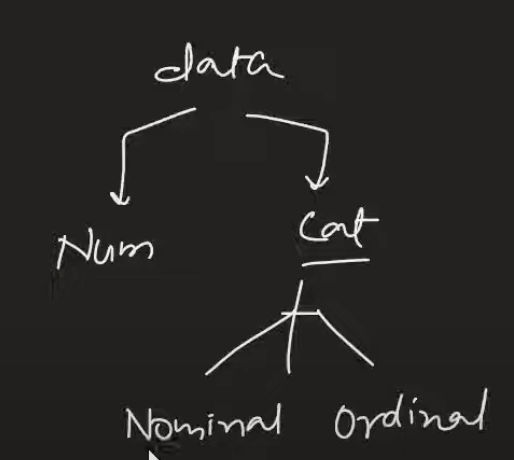

**Nominal Data**: In Norminal data, there is no order like state names. That is there is no value assign to it. We cannot say that the value of maharastra is more than west bengal. The value of 